In [174]:
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv('./data/car.csv', header=None)

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [176]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [177]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [178]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Data Processing

In [179]:
X = df.drop('class', axis=1)
y = df['class']

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

### Training model

In [181]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce #pip install category-encoders

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons','lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [182]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=42)

In [183]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [184]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

### Evaluting model

In [185]:
from sklearn.metrics import accuracy_score

# Accuracy train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

# Accuracy test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print(train_accuracy_tree, test_accuracy_tree)

0.7727930535455861 0.7976878612716763


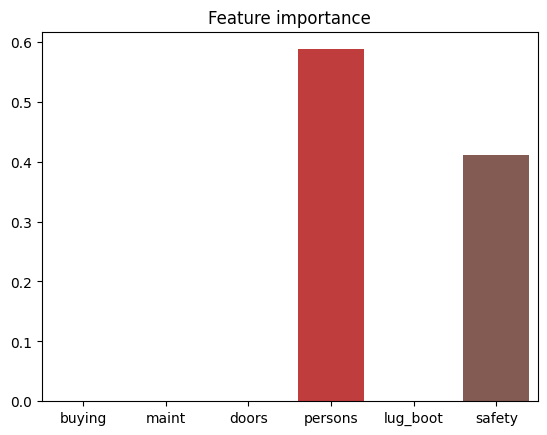

In [186]:
# Feature importance

import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances)
plt.title('Feature importance')
plt.show()


### Training Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=0000)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [188]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

### Evaluating Model

In [189]:
from sklearn.metrics import accuracy_score

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(train_accuracy_rf, test_accuracy_rf)

0.9971056439942113 0.9248554913294798


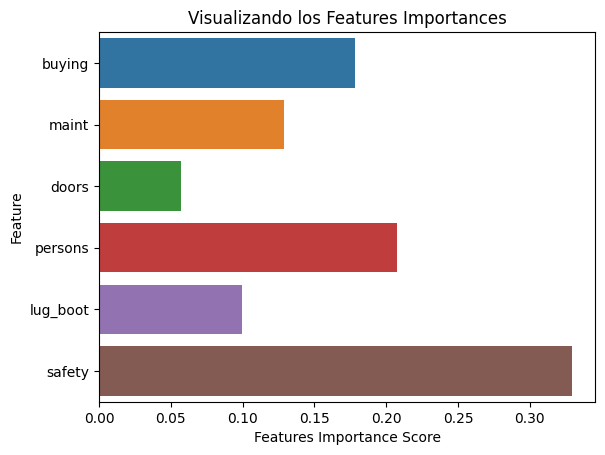

In [195]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

importances = rf.feature_importances_
columns = X.columns

sns.barplot(x=importances , y = columns)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title("Visualizando los Features Importances")
plt.show()

In [196]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred_rf)

print('Matriz de Confusion\n\n', cm)

Matriz de Confusion

 [[ 71   6   6   0]
 [  2   8   0   1]
 [  7   0 228   0]
 [  2   2   0  13]]


In [197]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.87      0.86      0.86        83
        good       0.50      0.73      0.59        11
       unacc       0.97      0.97      0.97       235
       vgood       0.93      0.76      0.84        17

    accuracy                           0.92       346
   macro avg       0.82      0.83      0.82       346
weighted avg       0.93      0.92      0.93       346

